In [687]:
# THIS PROGRAM TAKES IN DATA FROM REAL GM NBA AND USES PROPRIETARY PIERRE-BLAISE ANALYTICS TO DERIVE 
# APPROPRIATE BETTING LINES FOR NBA GAMES
# Data Source: https://basketball.realgm.com/ 
# Data Scraping courtesy of Beautiful Soup Python Library 

In [688]:
# Bring in necessary Python Librairies

import numpy as np
import pandas as pd
import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import seaborn as sns
import requests
import plotly as py 
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from datetime import datetime
import requests
import html5lib
import re 
%matplotlib inline

pd.set_option('display.max_columns', None)
sns.set()

In [689]:
# Find team player data 

URL1 = 'https://basketball.realgm.com/nba/teams/Boston-Celtics/2/Stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL2 = 'https://basketball.realgm.com/nba/teams/Milwaukee-Bucks/16/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL3 = 'https://basketball.realgm.com/nba/teams/New-Orleans-Pelicans/19/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL4 = 'https://basketball.realgm.com/nba/teams/Portland-Trail-Blazers/24/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL5 = 'https://basketball.realgm.com/nba/teams/Washington-Wizards/30/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL6 = 'https://basketball.realgm.com/nba/teams/San-Antonio-Spurs/26/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL7 = 'https://basketball.realgm.com/nba/teams/Phoenix-Suns/23/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL8 = 'https://basketball.realgm.com/nba/teams/Los-Angeles-Lakers/13/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL9 = 'https://basketball.realgm.com/nba/teams/Dallas-Mavericks/6/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL10 = 'https://basketball.realgm.com/nba/teams/Los-Angeles-Clippers/12/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL11 = 'https://basketball.realgm.com/nba/teams/Minnesota-Timberwolves/17/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL12 = 'https://basketball.realgm.com/nba/teams/Toronto-Raptors/28/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL13 = 'https://basketball.realgm.com/nba/teams/Memphis-Grizzlies/14/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL14 = 'https://basketball.realgm.com/nba/teams/Miami-Heat/15/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL15 = 'https://basketball.realgm.com/nba/teams/Brooklyn-Nets/38/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL16 = 'https://basketball.realgm.com/nba/teams/Atlanta-Hawks/1/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL17 = 'https://basketball.realgm.com/nba/teams/Utah-Jazz/29/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL18 = 'https://basketball.realgm.com/nba/teams/Denver-Nuggets/7/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL19 = 'https://basketball.realgm.com/nba/teams/Philadelphia-Sixers/22/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL20 = 'https://basketball.realgm.com/nba/teams/Oklahoma-City-Thunder/33/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL21 = 'https://basketball.realgm.com/nba/teams/Sacramento-Kings/25/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL22 = 'https://basketball.realgm.com/nba/teams/Indiana-Pacers/11/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL23 = 'https://basketball.realgm.com/nba/teams/Orlando-Magic/21/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL24 = 'https://basketball.realgm.com/nba/teams/Detroit-Pistons/8/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL25 = 'https://basketball.realgm.com/nba/teams/Cleveland-Cavaliers/5/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL26 = 'https://basketball.realgm.com/nba/teams/Chicago-Bulls/4/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL27 = 'https://basketball.realgm.com/nba/teams/Golden-State-Warriors/9/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL28 = 'https://basketball.realgm.com/nba/teams/New-York-Knicks/20/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL29 = 'https://basketball.realgm.com/nba/teams/Charlotte-Hornets/3/stats/2021/Averages/All/points/All/desc/1/Regular_Season'
URL30 = 'https://basketball.realgm.com/nba/teams/Houston-Rockets/10/stats/2021/Averages/All/points/All/desc/1/Regular_Season'

URLS = [URL1,URL2,URL3,URL4,URL5,URL6,URL7,URL8,URL9,URL10,URL11,URL12,URL13,URL14,URL15,URL16,
        URL17,URL18,URL19,URL20,URL21,URL22,URL23,URL24,URL25,URL26,URL27,URL28,URL29,URL30]

columns_players = ['No.','Player','Team','GP','MPG','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','TOV','PF','ORB','DRB',
          'RPG','APG','SPG','BPG','PPG']

columns_adv = ['No.','Player','Team','TS%','eFG%','TotalS%','ORB%','DRB%','TRB%','AST%','TOV%','STL%','BLK%','USG%',
                    'PPR','PPS','ORtg','DRtg','eDiff','FIC','PER']

columns_teams= ['No.','Team','GP','MPG','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','TOV','PF','ORB','DRB','RPG',
                'APG','SPG','BPG','PPG']

columns_teams_opp= ['No.','Team','oGP','oMPG','oFGM','oFGA','oFG%','o3PM','o3PA','o3P%','oFTM','oFTA','oFT%','oTOV','oPF',
                    'oORB','oDRB','oRPG','oAPG','oSPG','oBPG','oPPG']

columns_teams_wl = ['No.','Team','W','L','PCT','GB','L10','STRK','PPG','OPPG','DIFF','HOME','AWAY','DIV','CONF','REM','ROWP']

columns_espn = ['Rk','Name','Team','GP','MPG','ORPM','DRPM','RPM','WINS']



#response = requests.get(URL1)
#soup = BeautifulSoup(response.content,'html.parser')
#table = soup.find('table', attrs={'class':'tablesaw','data-tablesaw-mode':'swipe'}).tbody
#trs = table.find_all('tr')

df_players = pd.DataFrame(columns=columns_players)
df_teams = pd.DataFrame(columns=columns_teams)
df_teams_opp = pd.DataFrame(columns=columns_teams_opp)
df_teams_wl = pd.DataFrame(columns=columns_teams_wl)
df_espn = pd.DataFrame(columns=columns_espn)
df_teams_pl = pd.DataFrame(columns=columns_teams)
df_teams_pl_opp = pd.DataFrame(columns=columns_teams_opp)




#url_list=['https://basketball.realgm.com/nba/teams/Boston-Celtics/2/Stats']#,'https://basketball.realgm.com/nba/teams/Milwaukee-Bucks/16/Stats']#,'https://basketball.realgm.com/nba/teams/Milwaukee-Bucks/16/Stats']

# for i in url_list:
    
#     response = requests.get(url)
#     print(url)
#     soup = BeautifulSoup(repsonse.content,'html.parser')

#     print(soup)

## GET THE PLAYER DATA

In [690]:
for i in URLS:
    response = requests.get(i)
    soup = BeautifulSoup(response.content,'html.parser')
    table = soup.find('table', attrs={'class':'tablesaw','data-tablesaw-mode':'swipe'}).tbody
    trs = table.find_all('tr')

    for tr in trs:
        tds = tr.find_all('td')
        row = [td.text.replace('\n','') for td in tds]
        df_players = df_players.append(pd.Series(row, index = columns_players),ignore_index=True)

In [691]:
# Turn the entries of the numeric columns from string to float 

df_players[['GP','MPG','FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'TOV', 'PF', 'ORB', 'DRB', 'RPG', 'APG',
       'SPG', 'BPG', 'PPG']] = df_players[['GP','MPG','FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'TOV', 'PF', 'ORB', 'DRB', 'RPG', 'APG',
       'SPG', 'BPG', 'PPG']].astype(float)

In [692]:
df_players.head()

,No.,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
0,1,Jayson Tatum,BOS,64.0,35.8,9.5,20.6,0.459,2.9,7.6,0.386,4.6,5.3,0.868,2.7,1.9,0.8,6.6,7.4,4.3,1.2,0.5,26.4
1,2,Jaylen Brown,BOS,58.0,34.5,9.3,19.2,0.484,2.8,7.1,0.397,3.3,4.3,0.764,2.7,2.9,1.2,4.8,6.0,3.4,1.2,0.6,24.7
2,3,Kemba Walker,BOS,43.0,31.8,6.6,15.7,0.420,3.0,8.2,0.360,3.1,3.5,0.899,2.0,1.4,0.4,3.6,4.0,4.9,1.1,0.3,19.3
3,4,Marcus Smart,BOS,48.0,32.9,4.2,10.6,0.398,1.9,5.9,0.330,2.7,3.4,0.790,2.0,2.6,0.8,2.7,3.5,5.7,1.5,0.5,13.1
4,5,Evan Fournier,BOS,16.0,29.5,4.8,10.8,0.448,2.8,5.9,0.463,0.6,0.9,0.714,1.2,2.6,0.3,3.0,3.3,3.1,1.2,0.6,13.0


## Delete players who have been traded

In [693]:
df_players = df_players.drop(df_players[(df_players['Player']=='James Harden') & (df_players['Team']=='HOU')].index)
df_players = df_players.drop(df_players[(df_players['Player']=='Nikola Vucevic') & (df_players['Team']=='ORL')].index)
df_players = df_players.drop(df_players[(df_players['Player']=='Norman Powell') & (df_players['Team']=='TOR')].index)
df_players = df_players.drop(df_players[(df_players['Player']=='Lou Williams') & (df_players['Team']=='LAC')].index)
df_players = df_players.drop(df_players[(df_players['Player']=='Victor Oladipo') & (df_players['Team']=='HOU')].index)
df_players = df_players.drop(df_players[(df_players['Player']=='Kelly Olynyk') & (df_players['Team']=='MIA')].index)
df_players = df_players.drop(df_players[(df_players['Player']=='George Hill') & (df_players['Team']=='OKC')].index)
df_players = df_players.drop(df_players[(df_players['Player']=='Aaron Gordon') & (df_players['Team']=='ORL')].index)
df_players = df_players.drop(df_players[(df_players['Player']=='Evan Fournier') & (df_players['Team']=='ORL')].index)
df_players = df_players.drop(df_players[(df_players['Player']=='Victor Oladipo') & (df_players['Team']=='IND')].index)


In [694]:
df_players[df_players['Team']=='ORL']

,No.,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
448,3,Terrence Ross,ORL,46.0,29.3,5.5,13.4,0.412,1.9,5.7,0.337,2.6,3.0,0.870,1.6,1.9,0.3,3.1,3.4,2.3,1.0,0.5,15.6
450,5,Markelle Fultz,ORL,8.0,26.9,5.1,13.0,0.394,0.5,2.0,0.250,2.1,2.4,0.895,2.2,2.2,0.6,2.5,3.1,5.4,1.0,0.2,12.9
451,6,Cole Anthony,ORL,47.0,27.1,4.7,11.7,0.397,1.2,3.7,0.337,2.3,2.8,0.832,2.3,2.1,0.8,3.9,4.7,4.1,0.6,0.4,12.9
452,7,"Wendell Carter, Jr.",ORL,22.0,26.5,4.6,9.3,0.493,0.3,1.3,0.241,2.2,3.1,0.721,1.3,2.3,2.8,6.0,8.8,1.6,0.8,0.8,11.7
453,8,R.J. Hampton,ORL,26.0,25.2,4.3,9.7,0.439,0.8,2.7,0.319,1.8,2.7,0.657,1.6,1.5,0.7,4.2,5.0,2.8,0.6,0.3,11.2
454,9,Ignas Brazdeikis,ORL,8.0,29.2,4.4,9.9,0.443,1.4,3.4,0.407,1.0,1.5,0.667,1.4,2.8,1.2,3.9,5.1,2.0,0.5,0.4,11.1
455,10,Moe Wagner,ORL,11.0,26.0,3.5,8.5,0.409,1.5,3.9,0.372,2.6,3.0,0.879,1.2,3.3,1.0,3.9,4.9,1.1,0.4,0.8,11.0
456,11,Dwayne Bacon,ORL,72.0,25.7,4.1,10.1,0.402,0.8,2.9,0.285,2.0,2.4,0.824,0.6,1.4,0.4,2.7,3.1,1.3,0.6,0.1,10.9
457,12,Gary Harris,ORL,20.0,24.9,3.5,9.4,0.365,1.2,3.3,0.364,2.1,2.4,0.875,1.1,1.7,0.4,1.2,1.6,2.3,0.6,0.3,10.2
458,13,Michael Carter-Williams,ORL,31.0,25.8,3.4,8.7,0.389,0.5,2.0,0.246,1.6,2.6,0.613,2.2,2.6,1.3,3.2,4.5,4.2,0.8,0.5,8.8


In [695]:
# PULL UP THE PLAYER LIST FOR ANY TEAM 

df_players[df_players['Team']=='TOR']

,No.,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
211,1,Pascal Siakam,TOR,56.0,35.8,7.8,17.2,0.455,1.3,4.4,0.297,4.4,5.4,0.827,2.3,3.1,1.7,5.5,7.2,4.5,1.1,0.7,21.4
212,2,Fred VanVleet,TOR,52.0,36.5,6.5,16.7,0.389,3.3,9.2,0.366,3.2,3.7,0.885,1.8,2.3,0.6,3.6,4.2,6.3,1.7,0.7,19.6
214,4,Kyle Lowry,TOR,46.0,34.8,5.7,13.0,0.436,2.8,7.2,0.396,3.0,3.5,0.875,2.7,3.1,0.8,4.6,5.4,7.3,1.0,0.3,17.2
215,5,"Gary Trent, Jr.",TOR,17.0,31.8,6.1,15.4,0.395,2.6,7.3,0.355,1.5,1.8,0.806,0.7,1.7,0.4,3.2,3.6,1.3,1.1,0.2,16.2
216,6,Ogugua Anunoby,TOR,43.0,33.3,5.8,12.1,0.480,2.4,6.1,0.398,1.9,2.4,0.784,1.7,2.7,1.3,4.3,5.5,2.2,1.5,0.7,15.9
217,7,Chris Boucher,TOR,60.0,24.2,4.8,9.3,0.514,1.5,3.9,0.383,2.5,3.2,0.788,0.8,2.8,1.9,4.8,6.7,1.1,0.6,1.9,13.6
218,8,Khem Birch,TOR,19.0,30.4,5.0,9.0,0.556,0.5,1.6,0.290,1.5,2.3,0.636,1.1,2.4,3.0,4.6,7.6,1.9,0.8,1.2,11.9
219,9,Malachi Flynn,TOR,47.0,19.7,2.7,7.2,0.374,1.1,3.6,0.321,1.0,1.2,0.804,0.9,1.4,0.2,2.3,2.5,2.9,0.8,0.1,7.5
220,10,Henry Ellenson,TOR,2.0,19.2,2.5,7.0,0.357,1.0,4.5,0.222,1.5,2.0,0.750,0.0,3.5,1.5,4.5,6.0,2.5,0.0,0.0,7.5
221,11,Jalen Harris,TOR,13.0,13.2,2.8,5.5,0.500,1.3,2.8,0.472,0.5,0.7,0.778,1.1,1.2,0.2,1.2,1.4,1.3,0.6,0.0,7.4


In [696]:
#df_players = df_players.sort_values(by='Player')

In [697]:
#df_players[df_players['Player']=='Alex Len']

## Advanced Player Stats

In [698]:
columns_players_adv=['Player','Team','eDiff','TS%', 'eFG%', 'TotalS%', 'ORB%', 'DRB%','TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPS', 
                     'ORtg','DRtg', 'FIC', 'PER']

df_players_adv = pd.DataFrame(columns=columns_players_adv)


response = requests.get('https://basketball.realgm.com/nba/stats/2020/Advanced_Stats/Qualified/points/All/desc/1/Regular_Season')
soup = BeautifulSoup(response.content,'html.parser')
table = soup.find('table', attrs={'class':'tablesaw','data-tablesaw-mode':'swipe'}).tbody
trs = table.find_all('tr')

for tr in trs:
    tds = tr.find_all('td')
    row = [td.text.replace('\n','') for td in tds]
    df_players_adv = df_players_adv.append(pd.Series(row, index = columns_adv),ignore_index=True)

In [699]:
# DATA FRAME IS AUTOMATICALLY SORTED BY PER
df_players_adv[0:25]

,Player,Team,eDiff,TS%,eFG%,TotalS%,ORB%,DRB%,TRB%,AST%,TOV%,STL%,BLK%,USG%,PPS,ORtg,DRtg,FIC,PER,No.,PPR
0,Giannis Antetokounmpo,MIL,20.3,.613,.589,149.0,7.7,34.4,22.0,34.1,13.2,1.4,3.0,37.6,1.5,116.7,96.4,1523.1,31.9,1,0.3
1,James Harden,HOU,12.2,.626,.543,166.4,2.9,15.9,9.4,35.8,14.2,2.3,2.1,36.2,1.5,120.5,108.3,1527.0,29.2,2,1.3
2,Luka Doncic,DAL,6.3,.585,.531,153.7,4.1,25.2,14.8,45.4,14.8,1.4,0.6,36.6,1.4,116.5,110.2,1332.8,27.7,3,4.9
3,Anthony Davis,LAL,18.6,.610,.536,167.9,7.4,22.2,14.9,15.5,10.4,2.0,6.1,29.4,1.5,120.6,102.0,1269.4,27.5,4,-1.0
4,Damian Lillard,POR,9.3,.627,.563,175.1,1.4,10.5,6.0,34.6,11.0,1.3,0.8,30.3,1.5,126.3,117.0,1364.2,27.0,5,6.4
5,Kawhi Leonard,LAC,13.2,.589,.524,173.4,3.1,19.2,11.3,26.2,10.2,2.6,1.6,33.1,1.4,117.7,104.6,1068.0,27.0,6,2.0
6,Karl-Anthony Towns,MIN,9.8,.642,.600,171.6,8.5,26.1,17.1,22.7,13.2,1.3,2.9,29.0,1.5,121.7,111.9,741.5,26.9,7,-0.7
7,Kyrie Irving,BRK,8.5,.595,.546,179.4,3.6,12.6,8.2,35.0,10.1,1.9,1.2,32.2,1.3,120.0,111.5,367.0,26.3,8,4.9
8,Joel Embiid,PHI,10.3,.590,.512,161.5,10.4,32.6,21.6,17.1,13.8,1.4,3.6,32.8,1.5,113.8,103.5,904.1,25.7,9,-3.9
9,LeBron James,LAL,9.1,.577,.550,153.5,3.1,21.4,12.4,49.1,15.1,1.6,1.4,31.6,1.3,115.6,106.5,1466.1,25.5,10,8.4


In [700]:
# Change the string variables into float numbers

df_players_adv[['TS%', 'eFG%', 'TotalS%', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPS', 'ORtg',
       'DRtg', 'FIC', 'PER']] = df_players_adv[['TS%', 'eFG%', 'TotalS%', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPS', 'ORtg',
       'DRtg', 'FIC', 'PER']].astype(float)

df_players_adv['eDiff'] = df_players_adv['ORtg']- df_players_adv['DRtg']

# PPR is still stuck in string mode and tough to change due to minus sign. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

<Figure size 864x576 with 0 Axes>

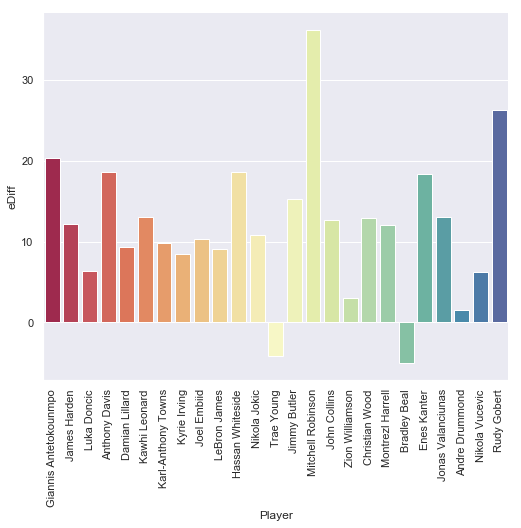

In [701]:
# Top Effective Difference Players 
plt.figure(figsize=(12,8))
sns.set()
sns.catplot(x='Player', y='eDiff', data=df_players_adv[0:25], kind='bar', height=6, aspect=1.3, palette='Spectral')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

<Figure size 864x576 with 0 Axes>

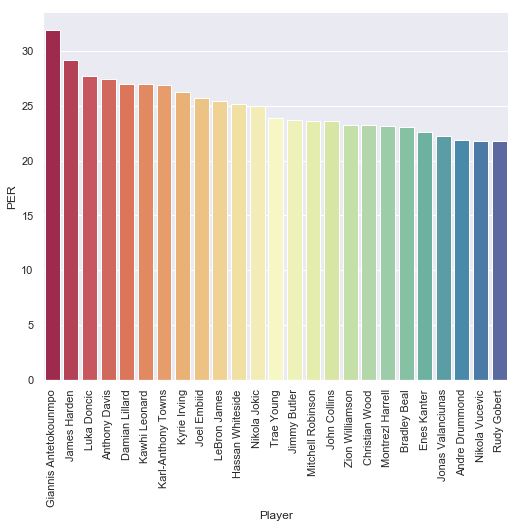

In [702]:
# Top PER Players 
plt.figure(figsize=(12,8))
sns.catplot(x='Player', y='PER', data=df_players_adv[0:25], kind='bar', height=6, aspect=1.3,palette='Spectral')
plt.xticks(rotation=90)

In [703]:
# check to see if it worked 
df_players_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   100 non-null    object 
 1   Team     100 non-null    object 
 2   eDiff    100 non-null    float64
 3   TS%      100 non-null    float64
 4   eFG%     100 non-null    float64
 5   TotalS%  100 non-null    float64
 6   ORB%     100 non-null    float64
 7   DRB%     100 non-null    float64
 8   TRB%     100 non-null    float64
 9   AST%     100 non-null    float64
 10  TOV%     100 non-null    float64
 11  STL%     100 non-null    float64
 12  BLK%     100 non-null    float64
 13  USG%     100 non-null    float64
 14  PPS      100 non-null    float64
 15  ORtg     100 non-null    float64
 16  DRtg     100 non-null    float64
 17  FIC      100 non-null    float64
 18  PER      100 non-null    float64
 19  No.      100 non-null    object 
 20  PPR      100 non-null    object 
dtypes: float64(17), o

## GET ESPN ADVANCED STATS

In [704]:
# # WORK IN PROGRESS 

# response = requests.get('http://www.espn.com/nba/statistics/rpm/_/sort/WINS')
# soup = BeautifulSoup(response.content,'html.parser')
# header = soup.find('table', attrs={'class':'colhead'})
# trs = table.find_all('tr')

# for tr in trs:
#     tds = tr.find_all('td')
#     row = [td.text.replace('\n','') for td in tds]
#     df_espn = df_espn.append(pd.Series(row, index = columns),ignore_index=True)

In [705]:
espn_rpm = ['MIL','LAL','HOU','DEN','OKC','TOR','LAC','GSW','DAL','UTA','BOS','MIA','PHI','HOU','MIL','DET','NOP',
            'GSW','DAL','TOR','POR','NOP','MIA','BKN','BOS','UTA','CHI','ORL','MIL','MIA','LAC','PHX','ORL','PHI','LAL',
            'PHX','OKC','OKC','POR','LAC']


## GET TEAM DATA

In [706]:
# Beautiful Soup call 

response = requests.get('https://basketball.realgm.com/nba/team-stats')
soup = BeautifulSoup(response.content,'html.parser')
table = soup.find('table', attrs={'class':'tablesaw','data-tablesaw-mode':'swipe'}).tbody
trs = table.find_all('tr')

for tr in trs:
    tds = tr.find_all('td')
    row = [td.text.replace('\n','') for td in tds]
    df_teams = df_teams.append(pd.Series(row, index = columns_teams),ignore_index=True)

In [707]:
df_teams = df_teams.sort_values('Team').reset_index()

In [708]:
# TEAMS ARE SORTED ALPHABETICALLY AND INDEX IS RESET FOR CONCAT
df_teams.head()

,index,No.,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
0,12,13,Atlanta,72,48.3,40.8,87.2,.468,12.4,33.4,.373,19.7,24.2,.812,13.2,19.3,10.6,35.1,45.6,24.1,7.0,4.8,113.7
1,15,16,Boston,72,48.3,41.5,88.9,.466,13.6,36.4,.374,16.1,20.8,.775,14.1,20.4,10.6,33.6,44.2,23.5,7.7,5.3,112.6
2,1,2,Brooklyn,72,48.3,43.1,87.3,.494,14.2,36.1,.392,18.1,22.5,.804,13.5,19.0,8.9,35.5,44.4,26.8,6.7,5.3,118.6
3,22,23,Charlotte,72,48.2,39.9,87.8,.455,13.7,37.0,.369,15.9,20.9,.761,14.8,18.0,10.6,33.2,43.8,26.8,7.8,4.8,109.5
4,20,21,Chicago,72,48.3,42.2,88.6,.476,12.6,34.0,.370,13.8,17.5,.791,15.1,18.9,9.6,35.3,45.0,26.8,6.7,4.2,110.7


## GET TEAM DEFENSE DATA

In [709]:
# Beautiful Soup Call 

response = requests.get('https://basketball.realgm.com/nba/team-stats/2021/Averages/Opponent_Totals/Regular_Season')
soup = BeautifulSoup(response.content,'html.parser')
table = soup.find('table', attrs={'class':'tablesaw','data-tablesaw-mode':'swipe'}).tbody
trs = table.find_all('tr')

for tr in trs:
    tds = tr.find_all('td')
    row = [td.text.replace('\n','') for td in tds]
    df_teams_opp = df_teams_opp.append(pd.Series(row, index = columns_teams_opp),ignore_index=True)

In [710]:
df_teams_opp = df_teams_opp.sort_values('Team').reset_index()

In [711]:
# TEAMS ARE SORTED ALPHABETICALLY AND INDEX IS RESET FOR CONCAT
df_teams_opp.head()

,index,No.,Team,oGP,oMPG,oFGM,oFGA,oFG%,o3PM,o3PA,o3P%,oFTM,oFTA,oFT%,oTOV,oPF,oORB,oDRB,oRPG,oAPG,oSPG,oBPG,oPPG
0,18,19,Atlanta,72,48.3,41.3,89.1,.463,11.9,34.2,.349,16.9,21.1,.803,12.4,19.8,10.0,32.7,42.7,24.4,7.7,5.0,111.4
1,19,20,Boston,72,48.3,39.9,86.0,.464,12.8,34.3,.374,18.5,23.5,.785,14.2,19.3,9.4,33.1,42.5,24.1,7.4,4.6,111.2
2,9,10,Brooklyn,72,48.3,41.9,91.3,.459,13.2,36.2,.365,17.1,22.0,.775,12.5,18.9,10.5,32.6,43.1,24.0,7.6,4.6,114.1
3,17,18,Charlotte,72,48.2,41.3,88.1,.468,14.5,39.5,.366,14.4,19.3,.745,14.8,18.6,10.6,34.5,45.2,27.1,8.1,4.8,111.4
4,16,17,Chicago,72,48.3,41.4,87.7,.473,11.5,32.3,.356,17.2,22.2,.774,12.7,17.7,8.7,33.5,42.1,24.1,8.5,5.1,111.6


## GET PLAYOFF DATA

In [712]:
#response = requests.get('https://basketball.realgm.com/nba/team-stats/2020/Averages/Team_Totals/Playoffs')
#soup = BeautifulSoup(response.content,'html.parser')
#table = soup.find('table', attrs={'class':'tablesaw','data-tablesaw-mode':'swipe'}).tbody
#trs = table.find_all('tr')

#for tr in trs:
#    tds = tr.find_all('td')
#    row = [td.text.replace('\n','') for td in tds]
#    df_teams_pl = df_teams_pl.append(pd.Series(row, index = columns_teams),ignore_index=True)
    
#response = requests.get('https://basketball.realgm.com/nba/team-stats/2020/Averages/Opponent_Totals/Playoffs')
#soup = BeautifulSoup(response.content,'html.parser')
#table = soup.find('table', attrs={'class':'tablesaw','data-tablesaw-mode':'swipe'}).tbody
#trs = table.find_all('tr')

#for tr in trs:
#    tds = tr.find_all('td')
#    row = [td.text.replace('\n','') for td in tds]
#    df_teams_pl_opp = df_teams_pl_opp.append(pd.Series(row, index = columns_teams_opp),ignore_index=True)
    
#df_teams_pl = df_teams_pl.sort_values('Team').reset_index()
#df_teams_pl_opp = df_teams_pl_opp.sort_values('Team').reset_index()

In [713]:
#df_teams_pl.head()

In [714]:
#df_teams_pl_opp.head()

In [715]:
#df_teams_pl = pd.concat([df_teams_pl,df_teams_pl_opp], axis=1)

In [716]:
#df_teams_pl = df_teams_pl.loc[:,~df_teams_pl.columns.duplicated()]

In [717]:
team_dict= {'Milwaukee':'MIL',
            'Houston':'HOU',
            'Dallas':'DAL',
            'L.A. Clippers':'LAC',
            'New Orleans':'NOP',
            'Portland':'POR',
            'Washington':'WAS',
            'San Antonio':'SAS',
            'Boston':'BOS',
            'Phoenix':'PHX',
            'L.A. Lakers':'LAL',
            'Minnesota':'MIN',
            'Toronto':'TOR',
            'Memphis':'MEM',
            'Miami':'MIA',
            'Brooklyn':'BRK',
            'Atlanta':'ATL',
            'Utah':'UTA',
            'Denver':'DEN',
            'Philadelphia':'PHI',
            'Oklahoma City':'OKC',
            'Sacramento':'SAC',
            'Indiana':'IND',
            'Orlando':'ORL',
            'Detroit':'DET',
            'Cleveland':'CLE',
            'Chicago':'CHI',
            'Golden State':'GSW',
            'New York':'NYK',
            'Charlotte':'CHA'}

df_teams_pl.replace(team_dict, inplace=True) 

In [718]:
#df_teams_pl[['GP', 'MPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
#       '3P%', 'FTM', 'FTA', 'FT%', 'TOV', 'PF', 'ORB', 'DRB', 'RPG', 'APG',
#       'SPG', 'BPG', 'PPG', 'oGP', 'oMPG', 'oFGM', 'oFGA', 'oFG%', 'o3PM',
#       'o3PA', 'o3P%', 'oFTM', 'oFTA', 'oFT%', 'oTOV', 'oPF', 'oORB', 'oDRB',
#       'oRPG', 'oAPG', 'oSPG', 'oBPG', 'oPPG']] = df_teams_pl[['GP', 'MPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
#       '3P%', 'FTM', 'FTA', 'FT%', 'TOV', 'PF', 'ORB', 'DRB', 'RPG', 'APG',
#       'SPG', 'BPG', 'PPG', 'oGP', 'oMPG', 'oFGM', 'oFGA', 'oFG%', 'o3PM',
#       'o3PA', 'o3P%', 'oFTM', 'oFTA', 'oFT%', 'oTOV', 'oPF', 'oORB', 'oDRB',
#       'oRPG', 'oAPG', 'oSPG', 'oBPG', 'oPPG']].astype(float)

In [719]:
#df_teams_pl['DIFF'] =df_teams_pl['PPG']-df_teams_pl['oPPG']

In [720]:
#df_teams_pl.head()

## Get Teams W-L Records, Streaks, etc

In [721]:
# Beautiful Soup Webscraping Call 

response = requests.get('https://basketball.realgm.com/nba/standings/league/2021')
soup = BeautifulSoup(response.content,'html.parser')
table = soup.find('table', attrs={'class':'tablesaw','data-tablesaw-mode':'swipe'}).tbody
trs = table.find_all('tr')

for tr in trs:
    tds = tr.find_all('td')
    row = [td.text.replace('\n','') for td in tds]
    df_teams_wl = df_teams_wl.append(pd.Series(row, index = columns_teams_wl),ignore_index=True)

In [722]:
df_teams_wl

,No.,Team,W,L,PCT,GB,L10,STRK,PPG,OPPG,DIFF,HOME,AWAY,DIV,CONF,REM,ROWP
0,1,Utah Jazz,52,20,.722,0,7-3,W 2,116.4,107.2,9.2,31-5,21-15,7-5,28-14,0,0.000
1,2,Phoenix Suns,51,21,.708,1,7-3,W 3,115.3,109.5,5.8,27-9,24-12,7-5,30-12,0,0.000
2,3,Philadelphia Sixers,49,23,.681,3,8-2,W 2,113.6,108.1,5.5,29-7,20-16,10-2,31-11,0,0.000
3,4,Brooklyn Nets,48,24,.667,4,6-4,W 5,118.6,114.1,4.5,28-8,20-16,8-4,26-16,0,0.000
4,5,Denver Nuggets,47,25,.653,5,6-4,L 1,115.1,110.1,5.0,25-11,22-14,9-3,26-16,0,0.000
5,6,Los Angeles Clippers,47,25,.653,5,4-6,L 2,114.0,107.8,6.2,26-10,21-15,9-3,27-15,0,0.000
6,7,Milwaukee Bucks,46,26,.639,6,8-2,L 1,120.1,114.2,5.9,26-10,20-16,11-1,30-12,0,0.000
7,8,Dallas Mavericks,42,30,.583,10,7-3,L 1,112.4,110.2,2.2,21-15,21-15,7-5,21-21,0,0.000
8,9,Portland Trail Blazers,42,30,.583,10,8-2,W 1,116.1,114.3,1.8,20-16,22-14,6-6,23-19,0,0.000
9,10,Los Angeles Lakers,42,30,.583,10,6-4,W 5,109.5,106.8,2.7,21-15,21-15,4-8,25-17,0,0.000


In [723]:
# TEAMS ARE SORTED ALPHABETICALLY AND INDEX IS RESET FOR CONCAT

df_teams_wl = df_teams_wl.sort_values('Team').reset_index()

In [724]:
df_teams_wl.head(3)

,index,No.,Team,W,L,PCT,GB,L10,STRK,PPG,OPPG,DIFF,HOME,AWAY,DIV,CONF,REM,ROWP
0,10,11,Atlanta Hawks,41,31,.569,11,7-3,W 4,113.7,111.4,2.3,25-11,16-20,9-3,24-18,0,0.000
1,14,15,Boston Celtics,36,36,.500,16,4-6,L 1,112.6,111.2,1.4,21-15,15-21,4-8,20-22,0,0.000
2,3,4,Brooklyn Nets,48,24,.667,4,6-4,W 5,118.6,114.1,4.5,28-8,20-16,8-4,26-16,0,0.000


In [725]:
df_teams_opp.head(3)

,index,No.,Team,oGP,oMPG,oFGM,oFGA,oFG%,o3PM,o3PA,o3P%,oFTM,oFTA,oFT%,oTOV,oPF,oORB,oDRB,oRPG,oAPG,oSPG,oBPG,oPPG
0,18,19,Atlanta,72,48.3,41.3,89.1,.463,11.9,34.2,.349,16.9,21.1,.803,12.4,19.8,10.0,32.7,42.7,24.4,7.7,5.0,111.4
1,19,20,Boston,72,48.3,39.9,86.0,.464,12.8,34.3,.374,18.5,23.5,.785,14.2,19.3,9.4,33.1,42.5,24.1,7.4,4.6,111.2
2,9,10,Brooklyn,72,48.3,41.9,91.3,.459,13.2,36.2,.365,17.1,22.0,.775,12.5,18.9,10.5,32.6,43.1,24.0,7.6,4.6,114.1


In [726]:
df_players[df_players['Team']=='IND']

,No.,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
426,1,Malcolm Brogdon,IND,56.0,34.5,7.9,17.5,0.453,2.6,6.7,0.388,2.7,3.2,0.864,2.1,2.0,1.0,4.2,5.2,5.9,0.9,0.3,21.2
427,2,Caris LeVert,IND,35.0,32.9,7.8,17.5,0.443,1.8,5.6,0.318,3.4,4.2,0.822,2.2,2.4,0.7,4.0,4.6,4.9,1.5,0.7,20.7
428,3,Domantas Sabonis,IND,62.0,36.0,7.8,14.6,0.535,0.8,2.6,0.321,3.9,5.3,0.732,3.4,3.3,2.4,9.5,12.0,6.7,1.2,0.5,20.3
430,5,T.J. Warren,IND,4.0,29.3,6.8,12.8,0.529,0.0,1.8,0.000,2.0,2.5,0.800,1.0,4.0,0.5,3.0,3.5,1.2,0.5,0.0,15.5
431,6,Doug McDermott,IND,66.0,24.5,5.4,10.1,0.532,1.7,4.3,0.388,1.2,1.5,0.816,0.8,1.8,0.9,2.4,3.3,1.3,0.3,0.1,13.6
432,7,Myles Turner,IND,47.0,31.0,4.4,9.2,0.477,1.5,4.4,0.335,2.4,3.0,0.782,1.4,3.5,1.3,5.2,6.5,1.0,0.9,3.4,12.6
433,8,OShae Brissett,IND,21.0,24.7,3.5,7.2,0.483,1.6,3.7,0.423,2.4,3.1,0.769,0.5,1.5,1.4,4.1,5.5,0.9,0.9,1.0,10.9
434,9,Justin Holiday,IND,72.0,30.3,3.6,8.7,0.413,2.4,6.3,0.382,0.9,1.2,0.788,0.8,1.9,0.4,3.1,3.6,1.7,1.0,0.6,10.5
435,10,Jeremy Lamb,IND,36.0,21.3,3.3,7.7,0.435,1.4,3.6,0.406,2.0,2.1,0.947,0.6,2.0,0.7,2.9,3.6,1.5,0.9,0.6,10.1
436,11,T.J. McConnell,IND,69.0,26.0,4.0,7.1,0.559,0.2,0.7,0.312,0.5,0.7,0.688,2.0,1.6,0.8,2.9,3.7,6.6,1.9,0.3,8.6


In [727]:
# CONCAT THREE DIFFERENT TEAMS STAT DATAFRAMES

df_stats = pd.concat([df_teams,df_teams_opp,df_teams_wl], axis=1)

In [728]:
# Replacing the Teams text with abbreviated word so that they can easily match up with the players 'Team' column

team_dict= {'Milwaukee':'MIL',
            'Houston':'HOU',
            'Dallas':'DAL',
            'L.A. Clippers':'LAC',
            'New Orleans':'NOP',
            'Portland':'POR',
            'Washington':'WAS',
            'San Antonio':'SAS',
            'Boston':'BOS',
            'Phoenix':'PHX',
            'L.A. Lakers':'LAL',
            'Minnesota':'MIN',
            'Toronto':'TOR',
            'Memphis':'MEM',
            'Miami':'MIA',
            'Brooklyn':'BRK',
            'Atlanta':'ATL',
            'Utah':'UTA',
            'Denver':'DEN',
            'Philadelphia':'PHI',
            'Oklahoma City':'OKC',
            'Sacramento':'SAC',
            'Indiana':'IND',
            'Orlando':'ORL',
            'Detroit':'DET',
            'Cleveland':'CLE',
            'Chicago':'CHI',
            'Golden State':'GSW',
            'New York':'NYK',
            'Charlotte':'CHA',
            'LA Clippers':'LAC',
            'LA Lakers':'LAL',
            'Okla City':'OKC'}

df_stats.replace(team_dict, inplace=True) 

## Get Last Three Games PPG Data

In [729]:
url_opp_last3 = 'https://www.teamrankings.com/nba/stat/opponent-points-per-game'

In [730]:
away_count = len(pd.read_html(url_opp_last3,header=None,flavor='html5lib')[0:])


In [731]:
opp_last3=[]

for j in range(0,away_count):
    data=pd.read_html(url_opp_last3,flavor='html5lib')[j]
    print(url_opp_last3)
    opp_last3.append(data)
    #print(final_list)
    
opp_last3 = pd.concat(opp_last3, axis=0)
opp_last3.sort_values('Team',inplace=True)
opp_last3.reset_index(inplace=True)
opp_last3.columns = ['index', 'Rank', 'Team', 'opp2020', 'oppLast 3', 'oppLast 1', 'oppHome', 'oppAway',
       'opp2019']

https://www.teamrankings.com/nba/stat/opponent-points-per-game


In [732]:
opp_last3

,index,Rank,Team,opp2020,oppLast 3,oppLast 1,oppHome,oppAway,opp2019
0,11,12,Atlanta,111.3,97.7,105.0,109.1,113.4,119.7
1,9,10,Boston,110.9,100.0,104.0,110.8,111.1,106.8
2,20,21,Brooklyn,113.8,97.7,93.0,110.9,116.8,113.1
3,14,15,Charlotte,111.8,125.7,144.0,108.5,115.1,109.6
4,12,13,Chicago,111.6,106.3,112.0,111.1,112.0,109.9
5,16,17,Cleveland,112.3,112.3,123.0,114.3,110.2,114.8
6,7,8,Dallas,110.1,116.3,103.0,110.8,109.4,113.1
7,8,9,Denver,110.3,121.3,109.0,110.9,109.6,109.3
8,10,11,Detroit,111.1,114.3,120.0,108.1,114.0,110.8
9,17,18,Golden State,112.6,107.0,117.0,111.3,113.8,115.0


In [733]:
url_last3 = 'https://www.teamrankings.com/nba/stat/points-per-game'
home_count = len(pd.read_html(url_last3,header=None,flavor='html5lib'))
last3=[]

for j in range(0,home_count):
    data=pd.read_html(url_last3,flavor='html5lib')[j]
    print(url_last3)
    last3.append(data)
    #print(final_list)
    
last3 = pd.concat(last3, axis=0)
last3.sort_values('Team',inplace=True)
last3.reset_index(inplace=True)

https://www.teamrankings.com/nba/stat/points-per-game


In [734]:
df_ppg=pd.concat([last3,opp_last3],axis=1)
df_ppg = df_ppg.loc[:,~df_ppg.columns.duplicated()]
df_ppg = df_ppg[['Team', '2020', 'Last 3', 'Last 1', 'Home', 'Away',
       '2019', 'opp2020', 'oppLast 3', 'oppLast 1', 'oppHome', 'oppAway',
       'opp2019']]
df_ppg.replace(team_dict, inplace=True) 

In [735]:
df_ppg

,Team,2020,Last 3,Last 1,Home,Away,2019,opp2020,oppLast 3,oppLast 1,oppHome,oppAway,opp2019
0,ATL,113.6,115.7,107.0,115.4,111.8,111.8,111.3,97.7,105.0,109.1,113.4,119.7
1,BOS,112.4,101.0,93.0,114.2,110.7,112.8,110.9,100.0,104.0,110.8,111.1,106.8
2,BRK,118.4,110.7,104.0,117.4,119.3,111.5,113.8,97.7,93.0,110.9,116.8,113.1
3,CHA,109.6,112.0,117.0,108.4,110.7,102.9,111.8,125.7,144.0,108.5,115.1,109.6
4,CHI,110.7,107.7,118.0,109.4,111.9,106.8,111.6,106.3,112.0,111.1,112.0,109.9
5,CLE,103.8,105.3,109.0,107.5,100.2,106.9,112.3,112.3,123.0,114.3,110.2,114.8
6,DAL,112.5,116.0,113.0,111.1,113.8,117.0,110.1,116.3,103.0,110.8,109.4,113.1
7,DEN,115.1,117.7,128.0,117.2,113.0,110.5,110.3,121.3,109.0,110.9,109.6,109.3
8,DET,106.6,99.3,107.0,105.1,108.1,107.2,111.1,114.3,120.0,108.1,114.0,110.8
9,GSW,113.5,108.3,112.0,116.3,110.7,106.3,112.6,107.0,117.0,111.3,113.8,115.0


In [736]:
df_ppg['PPG_recently'] = (df_ppg['Last 3']- df_ppg['2020'])
df_ppg['Home/Away'] = (df_ppg['Home'] - df_ppg['Away'])
df_ppg['Def_recently'] = (df_ppg['opp2020']-df_ppg['oppLast 3'])
df_ppg['Def_Home/Away'] = (df_ppg['oppAway'] - df_ppg['oppHome'])


In [737]:
df_melt = pd.melt(df_ppg, id_vars="Team", var_name="Categories", value_name="Scores").sort_values('Team')


In [738]:
df_melt.head(12)

,Team,Categories,Scores
0,ATL,2020,113.6
90,ATL,Home,115.4
390,ATL,Home/Away,3.6
360,ATL,PPG_recently,2.1
330,ATL,opp2019,119.7
60,ATL,Last 1,107.0
120,ATL,Away,111.8
420,ATL,Def_recently,13.6
150,ATL,2019,111.8
30,ATL,Last 3,115.7


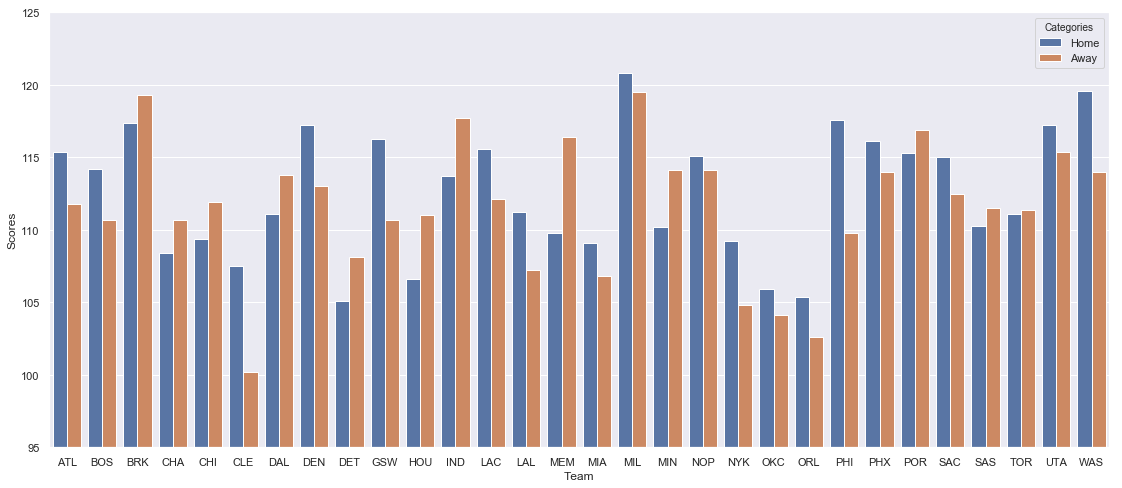

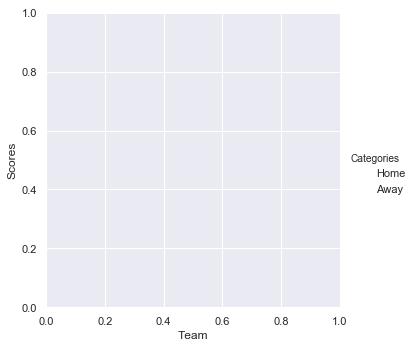

In [739]:
fig, ax = plt.subplots(figsize=(19,8))
ax.set(ylim=(95, 125))

sns.catplot(ax=ax,x='Team',y='Scores', data=df_melt,kind='bar',hue='Categories', hue_order=['Home','Away'])


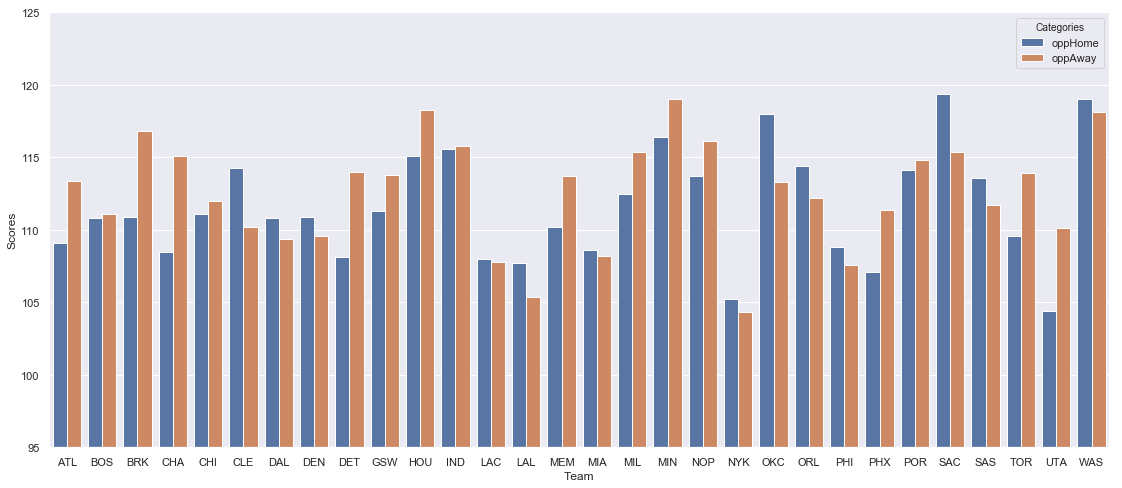

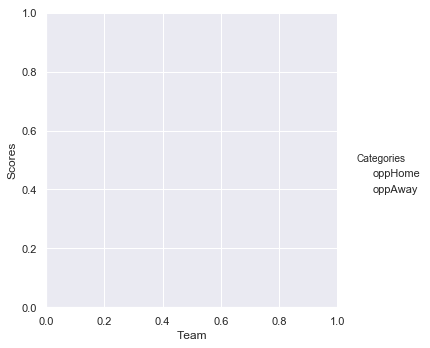

In [740]:
fig, ax = plt.subplots(figsize=(19,8))
ax.set(ylim=(95, 125))

sns.catplot(ax=ax,x='Team',y='Scores', data=df_melt,kind='bar',hue='Categories', hue_order=['oppHome','oppAway'])

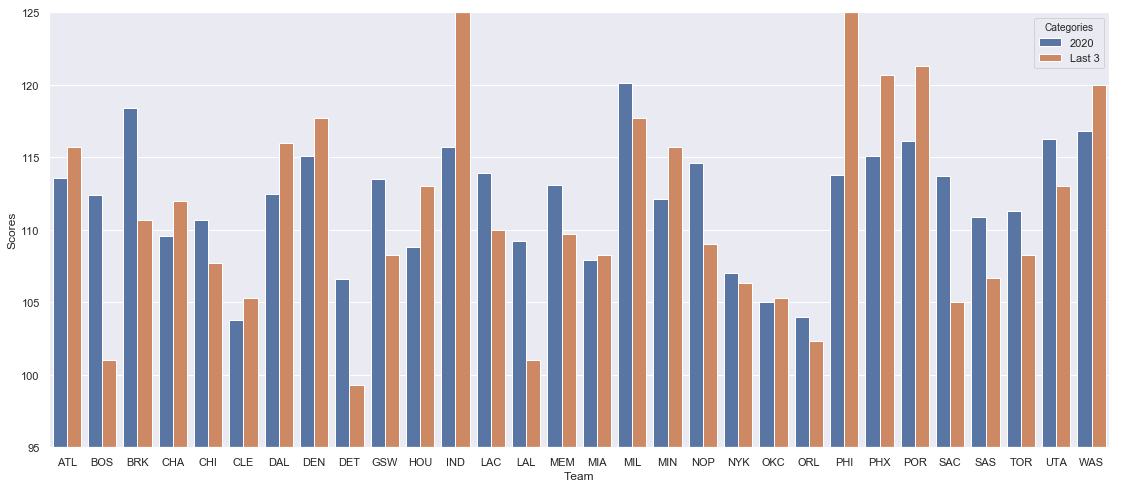

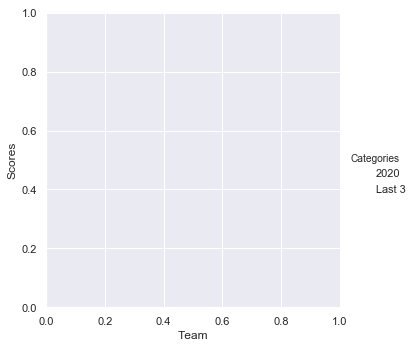

In [741]:
fig, ax = plt.subplots(figsize=(19,8))
ax.set(ylim=(95, 125))

sns.catplot(ax=ax,x='Team',y='Scores', data=df_melt,kind='bar',hue='Categories', hue_order=['2020','Last 3'])

In [742]:
df_ppg[df_ppg['Team']=='WAS']

,Team,2020,Last 3,Last 1,Home,Away,2019,opp2020,oppLast 3,oppLast 1,oppHome,oppAway,opp2019,PPG_recently,Home/Away,Def_recently,Def_Home/Away
29,WAS,116.8,120.0,118.0,119.6,114.0,114.4,118.5,119.3,125.0,119.0,118.1,119.1,3.2,5.6,-0.8,-0.9


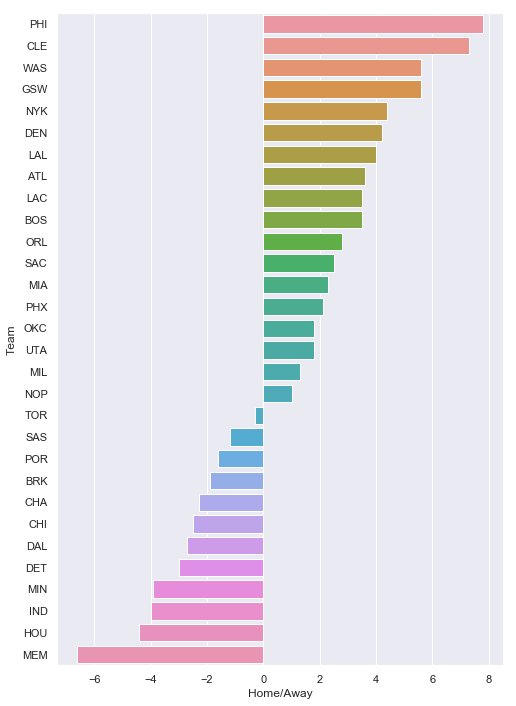

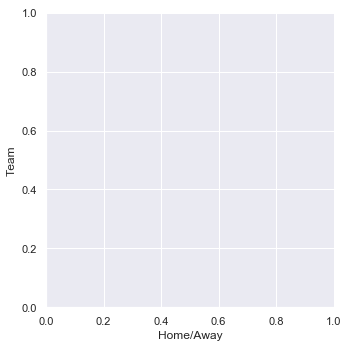

In [743]:
fig, ax = plt.subplots(figsize=(8,12))
#ax.set(ylim=(95, 125))

sns.catplot(ax=ax,x='Home/Away',y='Team', data=df_ppg,kind='bar',order=df_ppg.sort_values('Home/Away',ascending=False)['Team'])


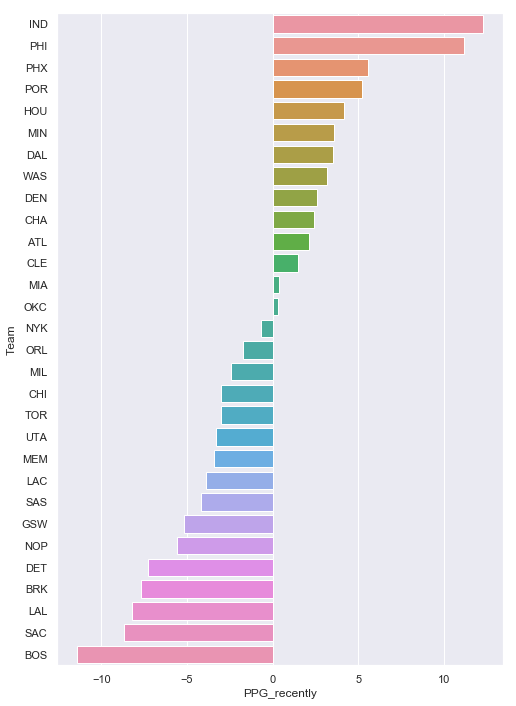

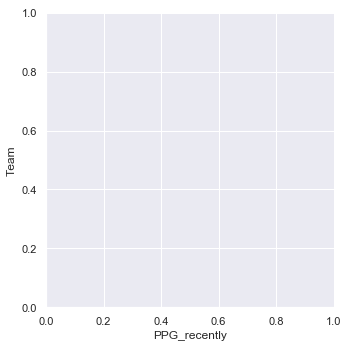

In [744]:
fig, ax = plt.subplots(figsize=(8,12))
#ax.set(ylim=(95, 125))

sns.catplot(ax=ax,x='PPG_recently',y='Team', data=df_ppg,kind='bar',order=df_ppg.sort_values('PPG_recently',ascending=False)['Team'])

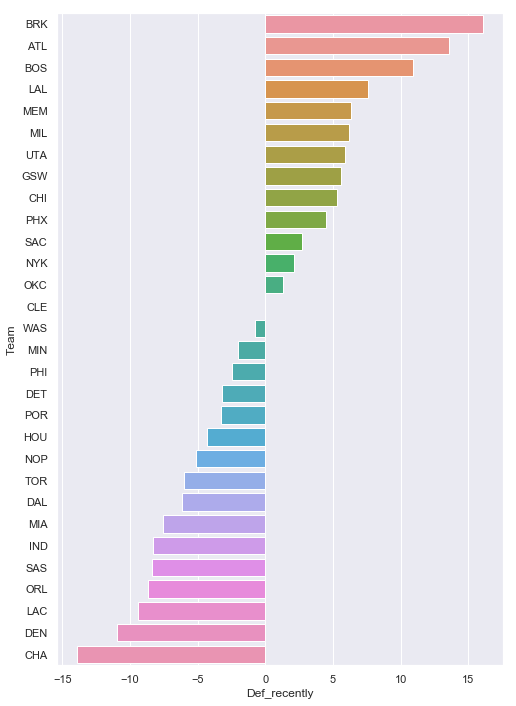

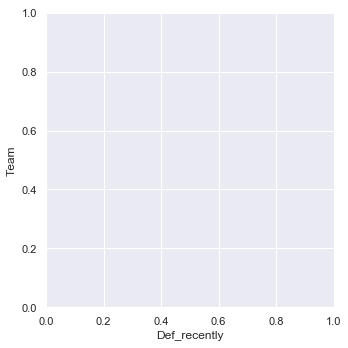

In [745]:
fig, ax = plt.subplots(figsize=(8,12))
#ax.set(ylim=(95, 125))

sns.catplot(ax=ax,x='Def_recently',y='Team', data=df_ppg,kind='bar',order=df_ppg.sort_values('Def_recently',ascending=False)['Team'])

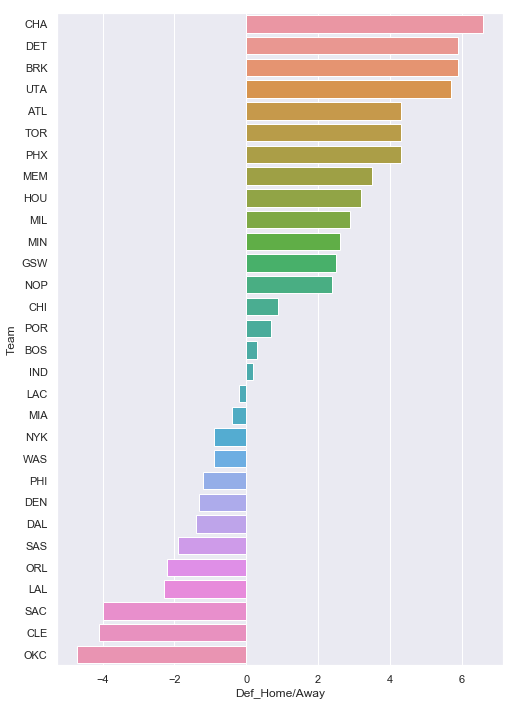

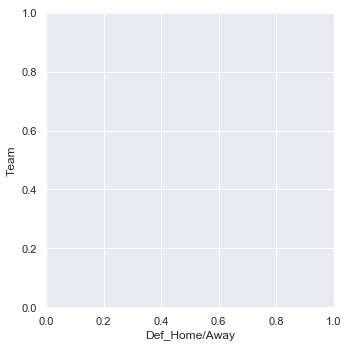

In [746]:
fig, ax = plt.subplots(figsize=(8,12))
#ax.set(ylim=(95, 125))

sns.catplot(ax=ax,x='Def_Home/Away',y='Team', data=df_ppg,kind='bar',order=df_ppg.sort_values('Def_Home/Away',ascending=False)['Team'])


In [747]:
df_ppg[df_ppg['Team']=='LAL']

,Team,2020,Last 3,Last 1,Home,Away,2019,opp2020,oppLast 3,oppLast 1,oppHome,oppAway,opp2019,PPG_recently,Home/Away,Def_recently,Def_Home/Away
13,LAL,109.2,101.0,90.0,111.2,107.2,113.3,106.6,99.0,99.0,107.7,105.4,107.3,-8.2,4.0,7.6,-2.3


In [748]:
df_stats.head()

,index,No.,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG,index,No.,Team,oGP,oMPG,oFGM,oFGA,oFG%,o3PM,o3PA,o3P%,oFTM,oFTA,oFT%,oTOV,oPF,oORB,oDRB,oRPG,oAPG,oSPG,oBPG,oPPG,index,No.,Team,W,L,PCT,GB,L10,STRK,PPG,OPPG,DIFF,HOME,AWAY,DIV,CONF,REM,ROWP
0,12,13,ATL,72,48.3,40.8,87.2,.468,12.4,33.4,.373,19.7,24.2,.812,13.2,19.3,10.6,35.1,45.6,24.1,7.0,4.8,113.7,18,19,ATL,72,48.3,41.3,89.1,.463,11.9,34.2,.349,16.9,21.1,.803,12.4,19.8,10.0,32.7,42.7,24.4,7.7,5.0,111.4,10,11,Atlanta Hawks,41,31,.569,11,7-3,W 4,113.7,111.4,2.3,25-11,16-20,9-3,24-18,0,0.000
1,15,16,BOS,72,48.3,41.5,88.9,.466,13.6,36.4,.374,16.1,20.8,.775,14.1,20.4,10.6,33.6,44.2,23.5,7.7,5.3,112.6,19,20,BOS,72,48.3,39.9,86.0,.464,12.8,34.3,.374,18.5,23.5,.785,14.2,19.3,9.4,33.1,42.5,24.1,7.4,4.6,111.2,14,15,Boston Celtics,36,36,.500,16,4-6,L 1,112.6,111.2,1.4,21-15,15-21,4-8,20-22,0,0.000
2,1,2,BRK,72,48.3,43.1,87.3,.494,14.2,36.1,.392,18.1,22.5,.804,13.5,19.0,8.9,35.5,44.4,26.8,6.7,5.3,118.6,9,10,BRK,72,48.3,41.9,91.3,.459,13.2,36.2,.365,17.1,22.0,.775,12.5,18.9,10.5,32.6,43.1,24.0,7.6,4.6,114.1,3,4,Brooklyn Nets,48,24,.667,4,6-4,W 5,118.6,114.1,4.5,28-8,20-16,8-4,26-16,0,0.000
3,22,23,CHA,72,48.2,39.9,87.8,.455,13.7,37.0,.369,15.9,20.9,.761,14.8,18.0,10.6,33.2,43.8,26.8,7.8,4.8,109.5,17,18,CHA,72,48.2,41.3,88.1,.468,14.5,39.5,.366,14.4,19.3,.745,14.8,18.6,10.6,34.5,45.2,27.1,8.1,4.8,111.4,18,19,Charlotte Hornets,33,39,.458,19,3-7,L 5,109.5,111.4,-1.9,18-18,15-21,8-4,20-22,0,0.000
4,20,21,CHI,72,48.3,42.2,88.6,.476,12.6,34.0,.370,13.8,17.5,.791,15.1,18.9,9.6,35.3,45.0,26.8,6.7,4.2,110.7,16,17,CHI,72,48.3,41.4,87.7,.473,11.5,32.3,.356,17.2,22.2,.774,12.7,17.7,8.7,33.5,42.1,24.1,8.5,5.1,111.6,21,22,Chicago Bulls,31,41,.431,21,5-5,W 1,110.7,111.6,-0.9,15-21,16-20,7-5,21-21,0,0.000


In [749]:
df_stats.shape

(30, 64)

In [750]:
# DELETE DUPLICATE COLUMNS

df_stats = df_stats.loc[:,~df_stats.columns.duplicated()]

In [751]:
# See if it worked

df_stats.head(10)

,index,No.,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG,oGP,oMPG,oFGM,oFGA,oFG%,o3PM,o3PA,o3P%,oFTM,oFTA,oFT%,oTOV,oPF,oORB,oDRB,oRPG,oAPG,oSPG,oBPG,oPPG,W,L,PCT,GB,L10,STRK,OPPG,DIFF,HOME,AWAY,DIV,CONF,REM,ROWP
0,12,13,ATL,72,48.3,40.8,87.2,.468,12.4,33.4,.373,19.7,24.2,.812,13.2,19.3,10.6,35.1,45.6,24.1,7.0,4.8,113.7,72,48.3,41.3,89.1,.463,11.9,34.2,.349,16.9,21.1,.803,12.4,19.8,10.0,32.7,42.7,24.4,7.7,5.0,111.4,41,31,.569,11,7-3,W 4,111.4,2.3,25-11,16-20,9-3,24-18,0,0.000
1,15,16,BOS,72,48.3,41.5,88.9,.466,13.6,36.4,.374,16.1,20.8,.775,14.1,20.4,10.6,33.6,44.2,23.5,7.7,5.3,112.6,72,48.3,39.9,86.0,.464,12.8,34.3,.374,18.5,23.5,.785,14.2,19.3,9.4,33.1,42.5,24.1,7.4,4.6,111.2,36,36,.500,16,4-6,L 1,111.2,1.4,21-15,15-21,4-8,20-22,0,0.000
2,1,2,BRK,72,48.3,43.1,87.3,.494,14.2,36.1,.392,18.1,22.5,.804,13.5,19.0,8.9,35.5,44.4,26.8,6.7,5.3,118.6,72,48.3,41.9,91.3,.459,13.2,36.2,.365,17.1,22.0,.775,12.5,18.9,10.5,32.6,43.1,24.0,7.6,4.6,114.1,48,24,.667,4,6-4,W 5,114.1,4.5,28-8,20-16,8-4,26-16,0,0.000
3,22,23,CHA,72,48.2,39.9,87.8,.455,13.7,37.0,.369,15.9,20.9,.761,14.8,18.0,10.6,33.2,43.8,26.8,7.8,4.8,109.5,72,48.2,41.3,88.1,.468,14.5,39.5,.366,14.4,19.3,.745,14.8,18.6,10.6,34.5,45.2,27.1,8.1,4.8,111.4,33,39,.458,19,3-7,L 5,111.4,-1.9,18-18,15-21,8-4,20-22,0,0.000
4,20,21,CHI,72,48.3,42.2,88.6,.476,12.6,34.0,.370,13.8,17.5,.791,15.1,18.9,9.6,35.3,45.0,26.8,6.7,4.2,110.7,72,48.3,41.4,87.7,.473,11.5,32.3,.356,17.2,22.2,.774,12.7,17.7,8.7,33.5,42.1,24.1,8.5,5.1,111.6,31,41,.431,21,5-5,W 1,111.6,-0.9,15-21,16-20,7-5,21-21,0,0.000
5,29,30,CLE,72,48.4,38.6,85.8,.450,10.0,29.7,.336,16.7,22.4,.743,15.5,18.2,10.4,32.3,42.8,23.8,7.8,4.5,103.8,72,48.4,42.0,86.7,.484,12.4,32.4,.383,15.9,20.4,.779,14.5,20.2,9.9,33.8,43.7,25.4,8.5,5.9,112.3,22,50,.306,30,1-9,L 2,112.3,-8.5,13-23,9-27,4-8,16-26,0,0.000
6,16,17,DAL,72,48.1,41.1,87.3,.470,13.8,38.1,.362,16.5,21.2,.778,12.1,19.4,9.1,34.2,43.3,22.9,6.2,4.3,112.4,72,48.1,40.1,87.1,.460,12.8,35.2,.365,17.2,22.5,.764,12.6,20.1,9.8,34.2,43.9,22.7,7.3,3.7,110.2,42,30,.583,10,7-3,L 1,110.2,2.2,21-15,21-15,7-5,21-21,0,0.000
7,7,8,DEN,72,48.6,43.2,89.2,.485,12.9,34.2,.377,15.7,19.5,.803,13.5,19.1,10.5,33.9,44.4,26.8,8.1,4.5,115.1,72,48.6,40.0,85.4,.469,13.0,35.7,.363,17.1,22.1,.773,14.2,19.2,9.1,32.1,41.2,25.9,7.5,4.5,110.1,47,25,.653,5,6-4,L 1,110.1,5.0,25-11,22-14,9-3,26-16,0,0.000
8,26,27,DET,72,48.4,38.7,85.6,.452,11.6,32.9,.351,17.8,23.4,.759,14.9,20.5,9.6,33.1,42.7,24.2,7.4,5.2,106.6,72,48.4,41.4,86.9,.476,11.3,31.4,.362,17.0,22.3,.760,14.1,20.4,10.0,34.4,44.3,24.8,8.0,5.8,111.1,20,52,.278,32,1-9,L 5,111.1,-4.5,13-23,7-29,1-11,12-30,0,0.000
9,11,12,GSW,72,48.1,41.3,88.2,.468,14.6,38.7,.376,16.6,21.1,.785,15.0,21.2,8.0,35.1,43.0,27.7,8.2,4.8,113.7,72,48.1,40.2,89.0,.452,12.4,34.5,.359,19.8,25.5,.778,14.8,19.5,10.7,36.6,47.3,23.8,7.9,4.3,112.7,39,33,.542,13,8-2,W 6,112.7,1.0,25-11,14-22,5-7,25-17,0,0.000


In [752]:
# Put the home Wins and losses and way wins and losses into their own columns

df_stats['HomeWin']= df_stats['HOME'].str.split("-", n = 1, expand = True)[0] 
df_stats['HomeLoss']= df_stats['HOME'].str.split("-", n = 1, expand = True)[1] 
df_stats['AwayWin']= df_stats['AWAY'].str.split("-", n = 1, expand = True)[0] 
df_stats['AwayLoss']= df_stats['AWAY'].str.split("-", n = 1, expand = True)[1] 

In [753]:
df_stats['W/L_Streak'] = df_stats['STRK'].str.split(" ",expand=True)[0]
df_stats['HowMany'] = df_stats['STRK'].str.split(" ",expand=True)[1]
df_stats['HowMany'] = df_stats['HowMany'].astype(float)

In [754]:
# Change string categories to numerical

df_stats[['GP', 'MPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA','3P%', 'FTM', 'FTA', 'FT%', 'TOV', 'PF', 'ORB', 'DRB', 'RPG', 'APG','SPG', 'BPG', 'PPG', 'oGP', 'oMPG', 'oFGM', 'oFGA', 'oFG%', 'o3PM',
       'o3PA', 'o3P%', 'oFTM', 'oFTA', 'oFT%', 'oTOV', 'oPF', 'oORB', 'oDRB',
       'oRPG', 'oAPG', 'oSPG', 'oBPG', 'oPPG', 'W', 'L', 'PCT', 'GB', 'OPPG', 
        'DIFF','AwayWin','AwayLoss','HomeWin','HomeLoss']] = df_stats[['GP', 'MPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'TOV', 'PF', 'ORB', 'DRB', 'RPG', 'APG',
       'SPG', 'BPG', 'PPG', 'oGP', 'oMPG', 'oFGM', 'oFGA', 'oFG%', 'o3PM',
       'o3PA', 'o3P%', 'oFTM', 'oFTA', 'oFT%', 'oTOV', 'oPF', 'oORB', 'oDRB',
       'oRPG', 'oAPG', 'oSPG', 'oBPG', 'oPPG', 'W', 'L', 'PCT', 'GB', 'OPPG', 'DIFF','AwayWin','AwayLoss','HomeWin','HomeLoss']].astype(float)

In [755]:
df_stats[df_stats['Team']=='OKC']

,index,No.,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG,oGP,oMPG,oFGM,oFGA,oFG%,o3PM,o3PA,o3P%,oFTM,oFTA,oFT%,oTOV,oPF,oORB,oDRB,oRPG,oAPG,oSPG,oBPG,oPPG,W,L,PCT,GB,L10,STRK,OPPG,DIFF,HOME,AWAY,DIV,CONF,REM,ROWP,HomeWin,HomeLoss,AwayWin,AwayLoss,W/L_Streak,HowMany
20,27,28,OKC,72.0,48.2,38.8,88.0,0.441,11.9,35.1,0.339,15.5,21.3,0.725,16.1,18.1,9.9,35.7,45.6,22.1,7.0,4.4,105.0,72.0,48.2,43.4,91.7,0.473,13.6,37.3,0.364,15.3,19.8,0.773,13.2,18.6,10.1,37.0,47.1,25.8,9.0,5.2,115.6,22.0,50.0,0.306,30.0,1-9,W 1,115.6,-10.6,10-26,12-24,3-9,12-30,0,0.000,10.0,26.0,12.0,24.0,W,1.0


In [756]:
## NOW TIME TO LET THE PROGRAM RUN 

# IMPORT SCHEDULE 

In [901]:
datetime.today().strftime('%Y-%m-%d')

'2021-06-02'

In [902]:
current_date = datetime.today().strftime('%Y%m%d')

In [903]:
scoreboard = 'https://www.cbssports.com/nba/scoreboard/'+current_date
game_count = len(pd.read_html(scoreboard,header=None,flavor='html5lib')[0:])
day = datetime.today().strftime('%Y-%m-%d')
print(scoreboard)

https://www.cbssports.com/nba/scoreboard/20210602


In [904]:
sched=[]

for j in range(0,game_count):
    data['Date'] = day
    data=pd.read_html(scoreboard,flavor='html5lib')[j]
    #print(scoreboard)
    data['Date'] = day
    sched.append(data)
    #print(final_list)
    
sched = pd.concat(sched, axis=0)
sched.reset_index(inplace=True)

In [905]:
sched

,index,0,1,Date,2
0,0,8 Wizards1-3,o229.5,2021-06-02,NaN
1,1,1 76ers3-1,-6,2021-06-02,NaN
2,0,Preview,Game Picks,2021-06-02,StubHub
3,0,5 Hawks3-1,o208,2021-06-02,NaN
4,1,4 Knicks1-3,-1.5,2021-06-02,NaN
5,0,Preview,Game Picks,2021-06-02,StubHub
6,0,8 Grizzlies1-3,o226,2021-06-02,NaN
7,1,1 Jazz3-1,-9.5,2021-06-02,NaN
8,0,Preview,Game Picks,2021-06-02,StubHub
9,0,5 Mavericks2-2,o217,2021-06-02,NaN


In [906]:
sched.drop(['index'],axis=1, inplace=True)
sched = sched[sched[0] != 'Preview']
sched = sched[[0,1,'Date']]
#sched.dropna(inplace=True)

In [907]:
sched

,0,1,Date
0,8 Wizards1-3,o229.5,2021-06-02
1,1 76ers3-1,-6,2021-06-02
3,5 Hawks3-1,o208,2021-06-02
4,4 Knicks1-3,-1.5,2021-06-02
6,8 Grizzlies1-3,o226,2021-06-02
7,1 Jazz3-1,-9.5,2021-06-02
9,5 Mavericks2-2,o217,2021-06-02
10,4 Clippers2-2,-7.5,2021-06-02


In [908]:
sched_Away=sched.iloc[::2].reset_index()
sched_Home = sched.iloc[1::2].reset_index()

In [909]:
sched = pd.concat([sched_Away,sched_Home],axis=1)

In [910]:
sched

,index,0,1,Date,index,0,1,Date
0,0,8 Wizards1-3,o229.5,2021-06-02,1,1 76ers3-1,-6,2021-06-02
1,3,5 Hawks3-1,o208,2021-06-02,4,4 Knicks1-3,-1.5,2021-06-02
2,6,8 Grizzlies1-3,o226,2021-06-02,7,1 Jazz3-1,-9.5,2021-06-02
3,9,5 Mavericks2-2,o217,2021-06-02,10,4 Clippers2-2,-7.5,2021-06-02


In [911]:
sched.columns=['Trash','Away','O/U','Date','Trash2','Home','VEGAS','Date2']

In [912]:
sched

,Trash,Away,O/U,Date,Trash2,Home,VEGAS,Date2
0,0,8 Wizards1-3,o229.5,2021-06-02,1,1 76ers3-1,-6,2021-06-02
1,3,5 Hawks3-1,o208,2021-06-02,4,4 Knicks1-3,-1.5,2021-06-02
2,6,8 Grizzlies1-3,o226,2021-06-02,7,1 Jazz3-1,-9.5,2021-06-02
3,9,5 Mavericks2-2,o217,2021-06-02,10,4 Clippers2-2,-7.5,2021-06-02


In [913]:
sched.dropna(inplace=True)
sched = sched[['Date','Away','Home','O/U','VEGAS']]

#sched['Away']=sched['Away'].str.split(expand=True)[0]
#sched['Home']=sched['Home'].str.split(expand=True)[0]
#sched['Away']=sched['Away'].str.split('(\d+)([A-Za-z]+)', expand=True)[0]
#sched['Home']=sched['Home'].str.split('(\d+)([A-Za-z]+)', expand=True)[0]


for i in sched.index:
    sched['Away'][i] = sched['Away'][i][:-3] 
    sched['Home'][i] = sched['Home'][i][:-3]
    
sched_dict= {'3 Bucks':'MIL',
                'Rockets':'HOU',
                '5 Mavericks':'DAL',
                '4 Clippers':'LAC',
                'Pelicans':'NOP',
                '6 Trail Blazers':'POR',
                '8 Wizards':'WAS',
                '10 Spurs':'SAS',
                '7 Celtics':'BOS',
                '2 Suns':'PHX',
                '7 Lakers':'LAL',
                'Timberwolves':'MIN',
                'Raptors':'TOR',
                '9 Grizzlies':'MEM',
                '8 Grizzlies':'MEM',
                '6 Heat':'MIA',
                '2 Nets':'BRK',
                '5 Hawks':'ATL',
                '1 Jazz':'UTA',
                '3 Nuggets':'DEN',
                '1 76ers':'PHI',
                'Thunder':'OKC',
                'Kings':'SAC',
                '9 Pacers':'IND',
                'Magic':'ORL',
                'Pistons':'DET',
                'Cavaliers':'CLE',
                'Bulls':'CHI',
                '8 Warriors':'GSW',
                '4 Knicks':'NYK',
                '10 Hornets':'CHA'}


sched.replace(sched_dict, inplace=True) 


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4527: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [914]:
sched

,Date,Away,Home,O/U,VEGAS
0,2021-06-02,WAS,PHI,o229.5,-6
1,2021-06-02,ATL,NYK,o208,-1.5
2,2021-06-02,8 Grizzlies,UTA,o226,-9.5
3,2021-06-02,DAL,LAC,o217,-7.5


In [915]:
for i in sched.index:
    if sched['VEGAS'][i] == 'PK':
        sched['VEGAS'][i] = 0

In [916]:
sched['VEGAS']=sched['VEGAS'].astype(float)

C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [917]:
sched

,Date,Away,Home,O/U,VEGAS
0,2021-06-02,WAS,PHI,o229.5,-6.0
1,2021-06-02,ATL,NYK,o208,-1.5
2,2021-06-02,8 Grizzlies,UTA,o226,-9.5
3,2021-06-02,DAL,LAC,o217,-7.5


In [868]:
#sched = pd.DataFrame({'Away':['ATL','DET','SAC','BOS','PHI','GSW','MIN','POR','WAS'], 'Home': ['CLE','ORL','BRK','DAL','TOR','NYK','MIL','DEN','LAC']})

In [869]:
df_ppg

,Team,2020,Last 3,Last 1,Home,Away,2019,opp2020,oppLast 3,oppLast 1,oppHome,oppAway,opp2019,PPG_recently,Home/Away,Def_recently,Def_Home/Away
0,ATL,113.6,115.7,107.0,115.4,111.8,111.8,111.3,97.7,105.0,109.1,113.4,119.7,2.1,3.6,13.6,4.3
1,BOS,112.4,101.0,93.0,114.2,110.7,112.8,110.9,100.0,104.0,110.8,111.1,106.8,-11.4,3.5,10.9,0.3
2,BRK,118.4,110.7,104.0,117.4,119.3,111.5,113.8,97.7,93.0,110.9,116.8,113.1,-7.7,-1.9,16.1,5.9
3,CHA,109.6,112.0,117.0,108.4,110.7,102.9,111.8,125.7,144.0,108.5,115.1,109.6,2.4,-2.3,-13.9,6.6
4,CHI,110.7,107.7,118.0,109.4,111.9,106.8,111.6,106.3,112.0,111.1,112.0,109.9,-3.0,-2.5,5.3,0.9
5,CLE,103.8,105.3,109.0,107.5,100.2,106.9,112.3,112.3,123.0,114.3,110.2,114.8,1.5,7.3,0.0,-4.1
6,DAL,112.5,116.0,113.0,111.1,113.8,117.0,110.1,116.3,103.0,110.8,109.4,113.1,3.5,-2.7,-6.2,-1.4
7,DEN,115.1,117.7,128.0,117.2,113.0,110.5,110.3,121.3,109.0,110.9,109.6,109.3,2.6,4.2,-11.0,-1.3
8,DET,106.6,99.3,107.0,105.1,108.1,107.2,111.1,114.3,120.0,108.1,114.0,110.8,-7.3,-3.0,-3.2,5.9
9,GSW,113.5,108.3,112.0,116.3,110.7,106.3,112.6,107.0,117.0,111.3,113.8,115.0,-5.2,5.6,5.6,2.5


# ENTER IN HOME AND AWAY TEAMS

In [870]:
# USING 2020 AVERAGES 

sched['Apf']=0.0
sched['Apa']=0.0
sched['Hpf']=0.0
sched['Hpa']=0.0
j=0
k=0

szn_scale=0.7
last3_scale=0.3

for i in sched['Away']:
    sched['Apf'][j] = (szn_scale*df_ppg[df_ppg['Team']==str(i)]['2020'].values[0])+(last3_scale*df_ppg[df_ppg['Team']==str(i)]['Last 3'].values[0])
    sched['Apa'][j] = (szn_scale*df_ppg[df_ppg['Team']==str(i)]['opp2020'].values[0])+(last3_scale*df_ppg[df_ppg['Team']==str(i)]['oppLast 3'].values[0])
    j +=1
    
for q in sched['Home']:
    sched['Hpf'][k] = (szn_scale*df_ppg[df_ppg['Team']==str(q)]['2020'].values[0])+(last3_scale*df_ppg[df_ppg['Team']==str(q)]['Last 3'].values[0])
    sched['Hpa'][k] = (szn_scale*df_ppg[df_ppg['Team']==str(q)]['opp2020'].values[0])+(last3_scale*df_ppg[df_ppg['Team']==str(q)]['oppLast 3'].values[0])
    k +=1

C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [871]:
sched

,Date,Away,Home,O/U,VEGAS,Apf,Apa,Hpf,Hpa
0,2021-05-29,MIL,MIA,o221.5,4.5,119.38,112.04,108.02,110.68
1,2021-05-29,DEN,POR,o227.5,-5.0,115.88,113.60,117.66,115.39
2,2021-05-29,PHI,WAS,o228,6.5,117.16,108.95,117.76,118.74
3,2021-05-29,UTA,MEM,o224,5.0,115.31,105.43,112.08,110.11


In [872]:
df_ppg[df_ppg["Team"].isin(["MIL", "MEM"])] 

,Team,2020,Last 3,Last 1,Home,Away,2019,opp2020,oppLast 3,oppLast 1,oppHome,oppAway,opp2019,PPG_recently,Home/Away,Def_recently,Def_Home/Away
14,MEM,113.1,109.7,112.0,109.8,116.4,112.8,112.0,105.7,109.0,110.2,113.7,113.9,-3.4,-6.6,6.3,3.5
16,MIL,120.1,117.7,132.0,120.8,119.5,117.8,113.9,107.7,98.0,112.5,115.4,108.7,-2.4,1.3,6.2,2.9
